<a href="https://colab.research.google.com/github/sharulms/d30-entry-/blob/main/Formative_Assessment_(Statistics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


import pandas as pd
data = pd.read_csv('house_price.csv')
data.head()

Saving house_price.csv to house_price.csv


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk          

<ipython-input-17-8bd1b05cdab6>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill',inplace=True)


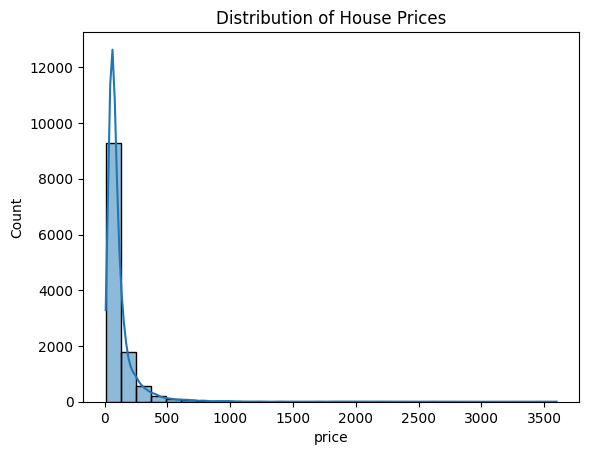

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


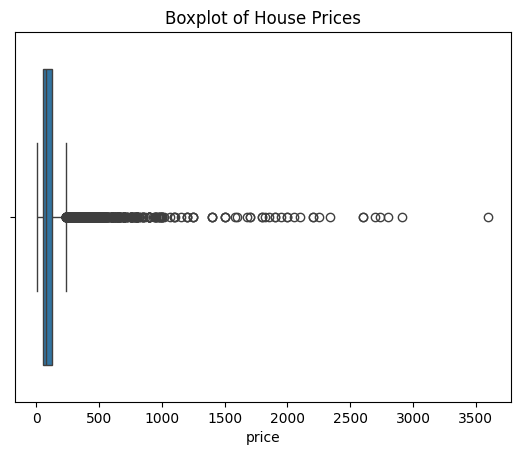

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('house_price.csv')

print(data.head())
print(data.info())
print(data.describe())

missing_values=data.isnull().sum()
print(missing_values[missing_values > 0])

data=data.drop_duplicates()
data.fillna(method='ffill',inplace=True)





sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.show()

sns.boxplot(x=data['price'])
plt.title('Boxplot of House Prices')
plt.show()







location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


<ipython-input-30-f7b89ae6d4f1>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


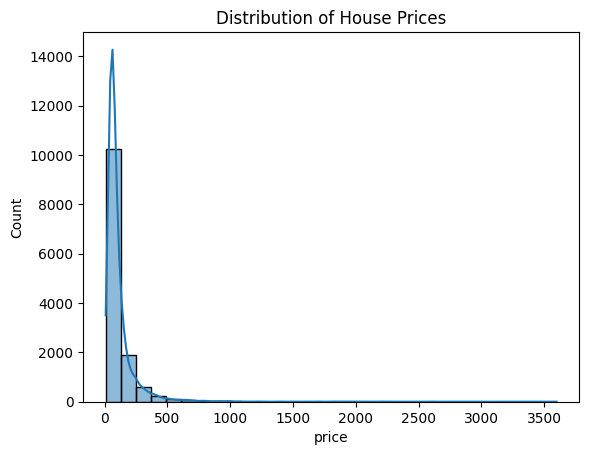

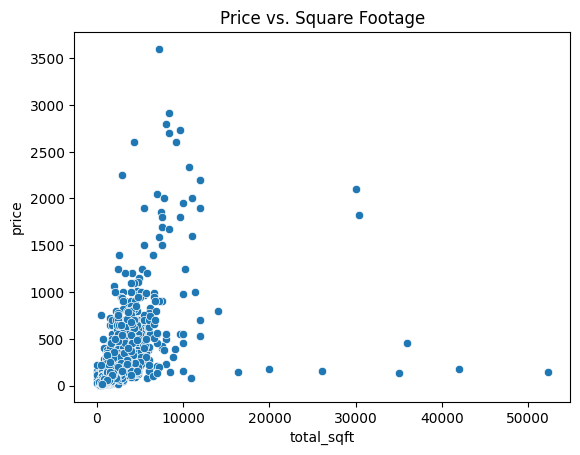

In [30]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('house_price.csv')

# Check for missing values
print(data.isnull().sum())

# Fill missing values
data.fillna(method='ffill', inplace=True)

# Calculate price per square foot
data['price_per_sqft'] = data['price'] / data['total_sqft']

# Univariate analysis
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.show()

# Bivariate analysis
sns.scatterplot(x='total_sqft', y='price', data=data)
plt.title('Price vs. Square Footage')
plt.show()




Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median

a) Mean and Standard deviation

b)Percentile method

c) IQR(Inter quartile range method)

d) Z Score method

In [37]:
#Mean And standard deviation
import pandas as pd
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv('house_price.csv')

# Step 2: Calculate mean and standard deviation
mean_price = data['price'].mean()  # Replace 'price' with the relevant column name
std_price = data['price'].std()

data['z_score'] = (data['price'] - mean_price) / std_price

# Identify outliers (Z-score > 3 or < -3)
outliers_mean_std = data[np.abs(data['z_score']) > 3]

print("Outliers using Mean and Standard Deviation:")
print(outliers_mean_std[['price', 'z_score']])



Outliers using Mean and Standard Deviation:
        price    z_score
7       600.0   3.269452
61      650.0   3.604627
157     760.0   4.342011
404    2200.0  13.995039
435     700.0   3.939802
...       ...        ...
12967   988.0   5.870407
12976   660.0   3.671662
13000   700.0   3.939802
13078  2600.0  16.676435
13081  2800.0  18.017134

[192 rows x 2 columns]


In [38]:
Percentile Method
# Calculate 1st and 99th percentiles
lower_percentile = data['price'].quantile(0.01)
upper_percentile = data['price'].quantile(0.99)

# Identify outliers
outliers_percentile = data[(data['price'] < lower_percentile) | (data['price'] > upper_percentile)]

# Display outliers
print("\nOutliers using Percentile Method:")
print(outliers_percentile[['price']])



Outliers using Percentile Method:
         price
20       15.00
99       17.00
130      16.50
157     760.00
169      11.00
...        ...
13078  2600.00
13081  2800.00
13101    15.00
13105    14.04
13199    17.00

[259 rows x 1 columns]


In [39]:
#IQR
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

# Display outliers
print("\nOutliers using IQR Method:")
print(outliers_iqr[['price']])



Outliers using IQR Method:
       price
7      600.0
9      370.0
11     295.0
18     290.0
22     380.0
...      ...
13186  325.0
13191  250.0
13195  231.0
13196  400.0
13198  488.0

[1250 rows x 1 columns]


In [40]:
# Z-SCORE
# Using the previously calculated z-scores, identify outliers
# (This step is the same as in part a)
outliers_z_score = data[np.abs(data['z_score']) > 3]

# Display outliers
print("\nOutliers using Z-Score Method:")
print(outliers_z_score[['price', 'z_score']])



Outliers using Z-Score Method:
        price    z_score
7       600.0   3.269452
61      650.0   3.604627
157     760.0   4.342011
404    2200.0  13.995039
435     700.0   3.939802
...       ...        ...
12967   988.0   5.870407
12976   660.0   3.671662
13000   700.0   3.939802
13078  2600.0  16.676435
13081  2800.0  18.017134

[192 rows x 2 columns]


Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


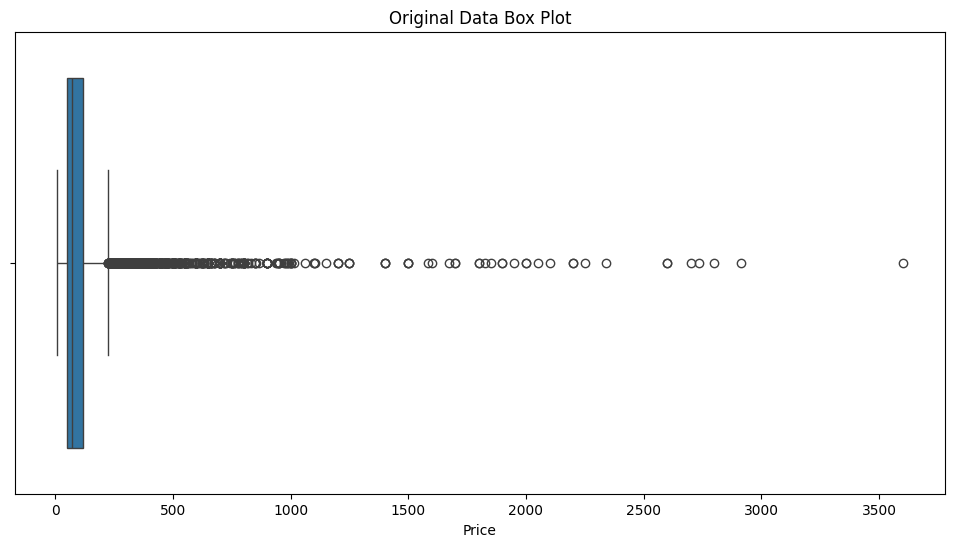

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


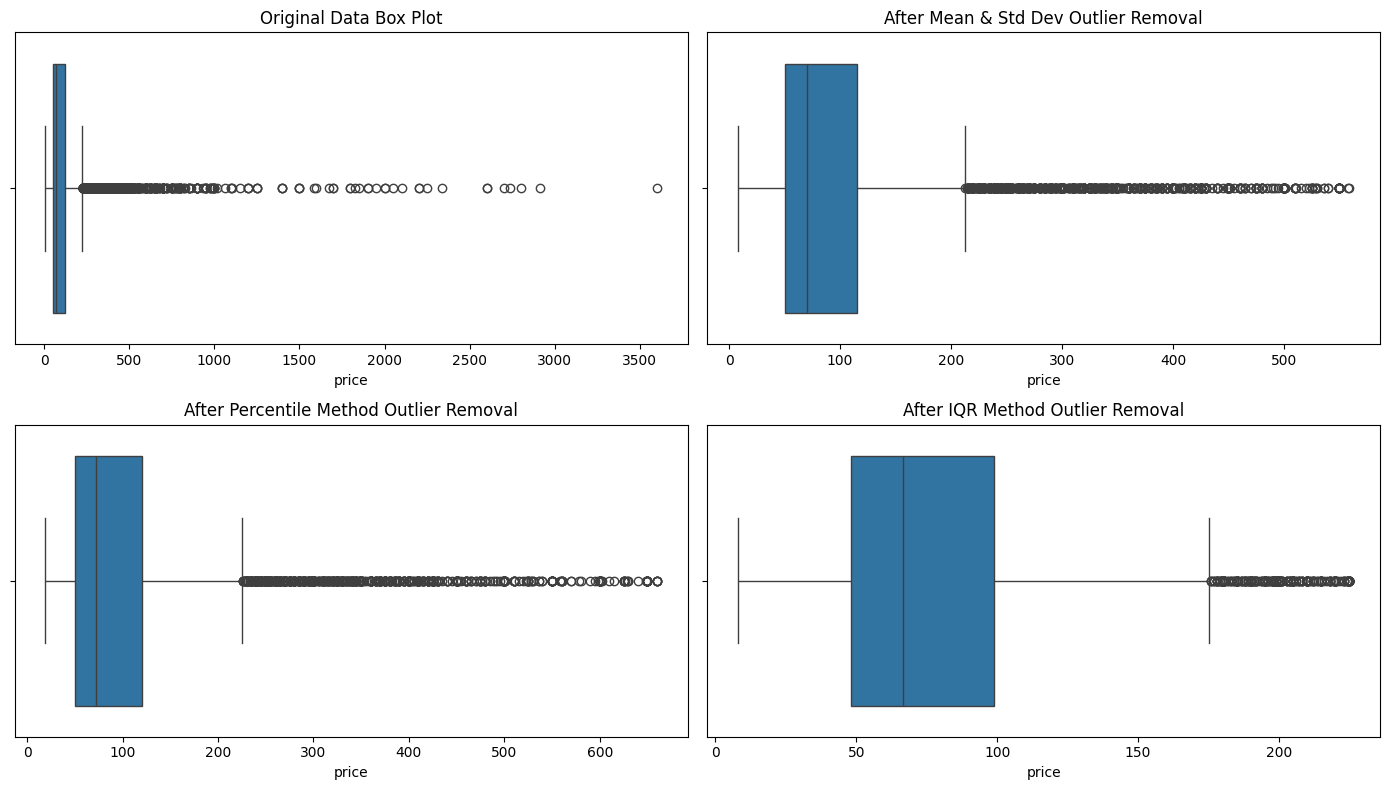

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('house_price.csv')  # Replace with your CSV file name

# Original data box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['price'])
plt.title('Original Data Box Plot')
plt.xlabel('Price')
plt.show()

# a) Mean and Standard Deviation
mean_price = data['price'].mean()
std_price = data['price'].std()
data['z_score'] = (data['price'] - mean_price) / std_price
outliers_mean_std = data[np.abs(data['z_score']) > 3]
data_mean_std_trimmed = data[np.abs(data['z_score']) <= 3]

# b) Percentile Method
lower_percentile = data['price'].quantile(0.01)
upper_percentile = data['price'].quantile(0.99)
data_percentile_trimmed = data[(data['price'] >= lower_percentile) & (data['price'] <= upper_percentile)]

# c) IQR Method
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_iqr_trimmed = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

# d) Z-Score Method (same as Mean and Std deviation)
data_z_score_trimmed = data[np.abs(data['z_score']) <= 3]

# Create box plots for each method
plt.figure(figsize=(14, 8))

# Original data
plt.subplot(2, 2, 1)
sns.boxplot(x=data['price'])
plt.title('Original Data Box Plot')

# Mean and Standard Deviation trimmed
plt.subplot(2, 2, 2)
sns.boxplot(x=data_mean_std_trimmed['price'])
plt.title('After Mean & Std Dev Outlier Removal')

# Percentile Method trimmed
plt.subplot(2, 2, 3)
sns.boxplot(x=data_percentile_trimmed['price'])
plt.title('After Percentile Method Outlier Removal')

# IQR Method trimmed
plt.subplot(2, 2, 4)
sns.boxplot(x=data_iqr_trimmed['price'])
plt.title('After IQR Method Outlier Removal')

plt.tight_layout()
plt.show()


 Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.

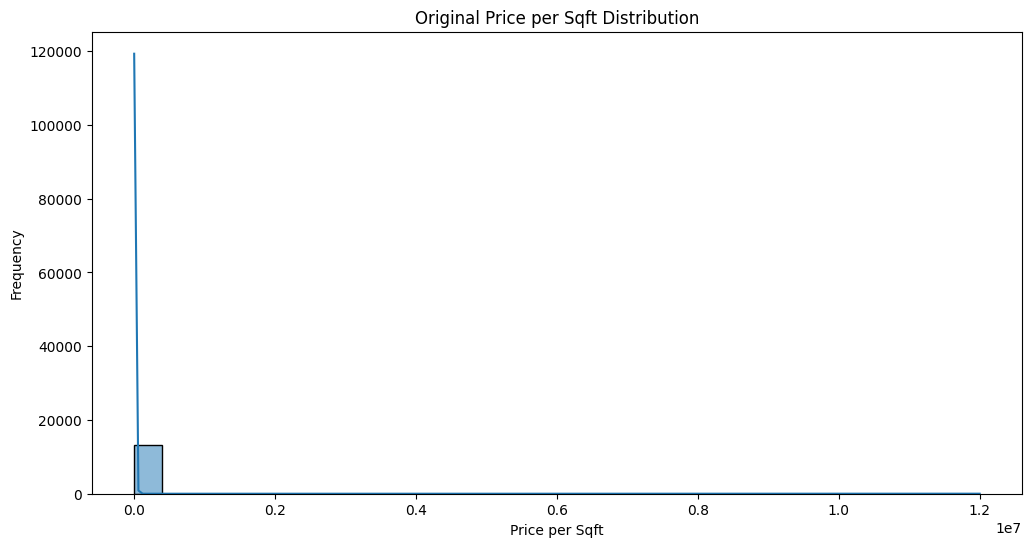

Original Skewness: 108.26875024325159
Original Kurtosis: 12090.633538860382


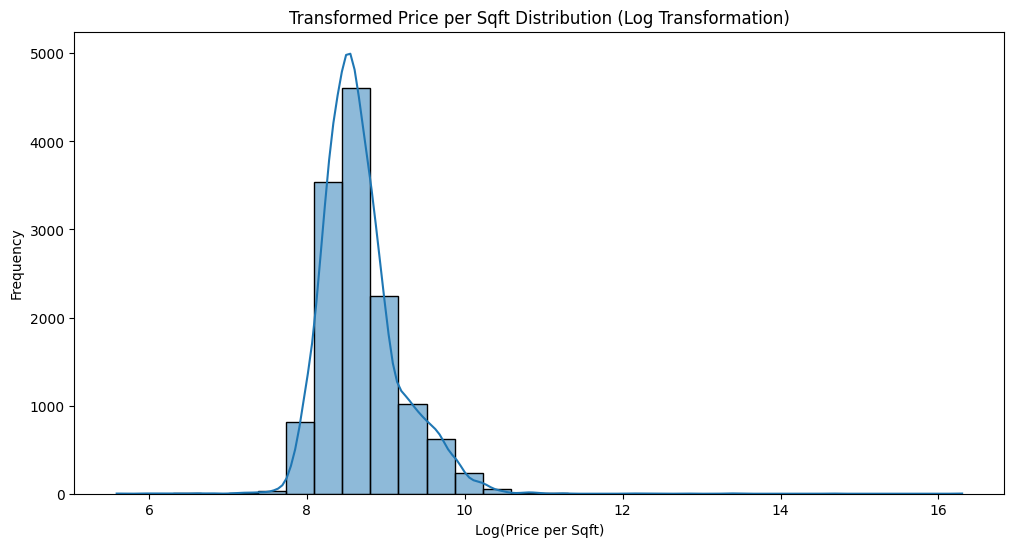

Transformed Skewness: 1.4003259019533636
Transformed Kurtosis: 9.203000543610957


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load the dataset
data = pd.read_csv('house_price.csv')  # Replace with your CSV file name

# Check for the column 'price per sqft'
# Assuming the column is named 'price_per_sqft', adjust if necessary
price_per_sqft = data['price_per_sqft']  # Replace with the correct column name

# 1. Visualize the Original Distribution
plt.figure(figsize=(12, 6))
sns.histplot(price_per_sqft, bins=30, kde=True)
plt.title('Original Price per Sqft Distribution')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

# 2. Calculate Skewness and Kurtosis for Original Data
original_skewness = skew(price_per_sqft)
original_kurtosis = kurtosis(price_per_sqft)

print(f"Original Skewness: {original_skewness}")
print(f"Original Kurtosis: {original_kurtosis}")

# 3. Transform the Data
# Applying log transformation (ensure all values are positive)
price_per_sqft_transformed = np.log(price_per_sqft + 1)  # Adding 1 to avoid log(0)

# 4. Visualize the Transformed Distribution
plt.figure(figsize=(12, 6))
sns.histplot(price_per_sqft_transformed, bins=30, kde=True)
plt.title('Transformed Price per Sqft Distribution (Log Transformation)')
plt.xlabel('Log(Price per Sqft)')
plt.ylabel('Frequency')
plt.show()

# 5. Calculate Skewness and Kurtosis for Transformed Data
transformed_skewness = skew(price_per_sqft_transformed)
transformed_kurtosis = kurtosis(price_per_sqft_transformed)

print(f"Transformed Skewness: {transformed_skewness}")
print(f"Transformed Kurtosis: {transformed_kurtosis}")



 Check the correlation between all the numerical columns and plot heatmap.

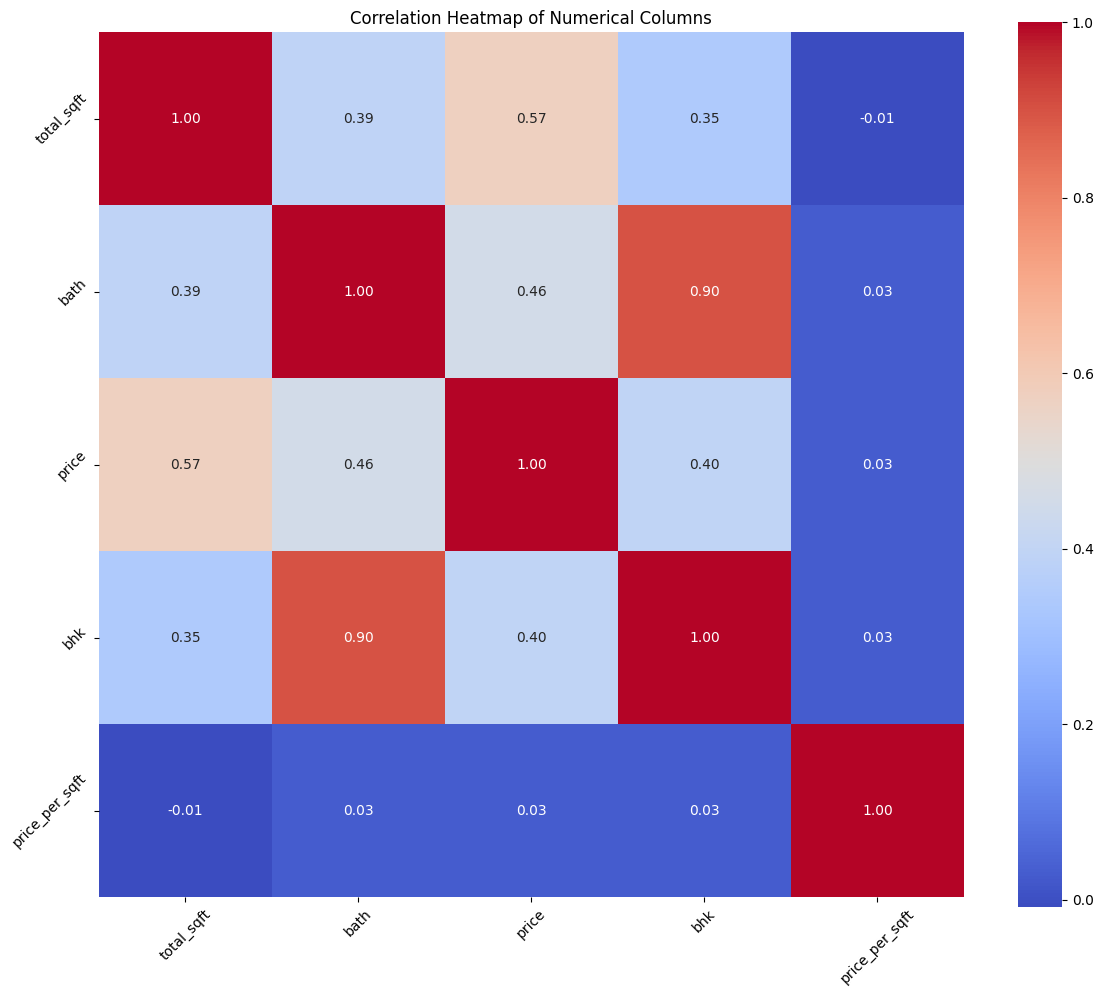

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('house_price.csv')  # Replace with your CSV file name

# Step 1: Compute the correlation matrix
# Select only numerical columns
# Drop rows with any NaN values
numeric_data = numeric_data.dropna()
correlation_matrix = numeric_data.corr()


correlation_matrix = numeric_data.corr()

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Step 3: Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)

# Step 4: Add title and labels
plt.title('Correlation Heatmap of Numerical Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Show the heatmap
plt.show()



Draw Scatter plot between the variables to check the correlation between them

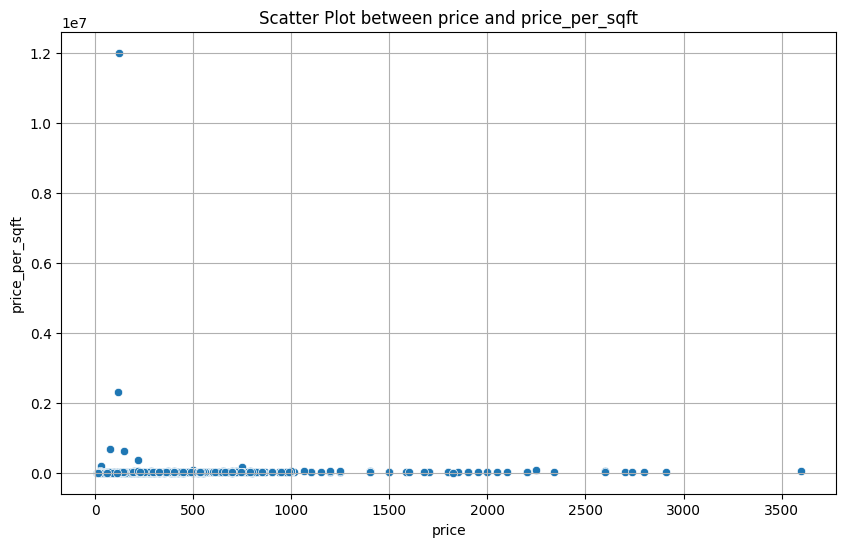

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('house_price.csv')  # Replace with your CSV file name

# Step 1: Select the variables for the scatter plot
# Replace 'price' and 'price_per_sqft' with your actual column names
x_variable = 'price'  # Example variable 1
y_variable = 'price_per_sqft'  # Example variable 2

# Step 2: Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=x_variable, y=y_variable)
plt.title(f'Scatter Plot between {x_variable} and {y_variable}')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.grid(True)

# Show the plot
plt.show()
